In [1]:
#import necessary models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#rading csv file
df = pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
#checking missing values and object values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
#checking null values
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
#as normalized losses is object checking its object values
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
128     6
134     6
104     6
95      5
74      5
94      5
65      5
168     5
102     5
85      5
103     5
106     4
148     4
122     4
118     4
93      4
154     3
115     3
83      3
125     3
101     3
137     3
81      2
197     2
110     2
113     2
192     2
108     2
89      2
87      2
164     2
145     2
158     2
194     2
129     2
153     2
188     2
119     2
256     1
142     1
77      1
78      1
98      1
90      1
107     1
121     1
231     1
186     1
Name: normalized-losses, dtype: int64

In [6]:
#checking objects in horsepower
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
160     6
62      6
101     6
114     6
145     5
82      5
102     5
97      5
76      5
84      5
86      4
111     4
123     4
92      4
73      3
90      3
207     3
85      3
152     3
182     3
121     3
161     2
112     2
156     2
56      2
176     2
162     2
184     2
100     2
155     2
94      2
?       2
52      2
55      1
154     1
143     1
58      1
64      1
135     1
175     1
72      1
60      1
106     1
142     1
134     1
115     1
78      1
140     1
200     1
262     1
120     1
288     1
48      1
Name: horsepower, dtype: int64

In [7]:
#step1 -: replace with np.nan
df["normalized-losses"].replace("?", np.nan, inplace=True)
df["horsepower"].replace("?", np.nan, inplace=True)

#step2 -: change the datatype
df["normalized-losses"] =df["normalized-losses"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")

#step3 -: get the mean
npmean = df["normalized-losses"].mean()
hpmean = df["horsepower"].mean()

#step4 -: use fillna
df["normalized-losses"].fillna(npmean, inplace=True)
df["horsepower"].fillna(hpmean, inplace=True)

In [8]:
df["normalized-losses"].value_counts()

122.0    45
161.0    11
91.0      8
150.0     7
134.0     6
104.0     6
128.0     6
103.0     5
102.0     5
74.0      5
65.0      5
168.0     5
85.0      5
95.0      5
94.0      5
118.0     4
93.0      4
106.0     4
148.0     4
101.0     3
115.0     3
125.0     3
83.0      3
154.0     3
137.0     3
108.0     2
145.0     2
188.0     2
81.0      2
158.0     2
129.0     2
197.0     2
153.0     2
192.0     2
164.0     2
194.0     2
110.0     2
113.0     2
89.0      2
119.0     2
87.0      2
256.0     1
90.0      1
142.0     1
78.0      1
186.0     1
231.0     1
107.0     1
98.0      1
121.0     1
77.0      1
Name: normalized-losses, dtype: int64

# Outlier

<AxesSubplot:xlabel='price'>

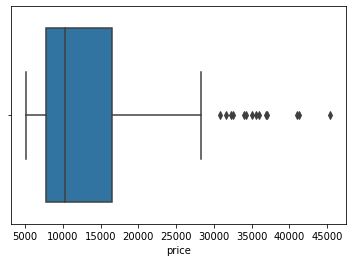

In [9]:
sns.boxplot(df["price"])

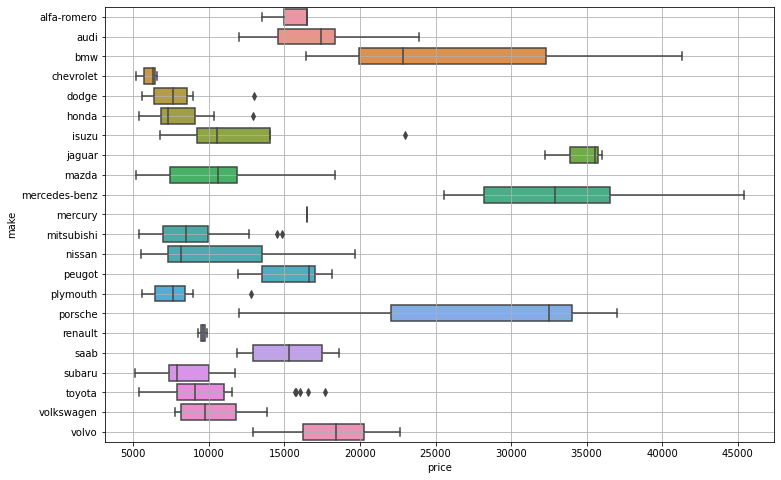

In [8]:
#visualizing outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="price", y="make")
plt.grid(True)

In [9]:
#checking rows of outliers
df[(df["make"]=="dodge") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,12964


In [10]:
#deleting rows of outlier
df.drop(29, inplace=True)

In [11]:
df[(df["make"]=="honda") & (df["price"]>11000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101,24,28,12945


In [12]:
df.drop(41, inplace=True)

In [13]:
df[(df["make"]=="isuzu")& (df["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,?,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70,38,43,23000


In [14]:
df.drop(45, inplace=True)

In [15]:
df[(df["make"]=="mitsubishi") & (df["price"]>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14869
84,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14489


In [16]:
df.drop([83,84], inplace=True)

In [17]:
df[(df["make"]=="plymouth") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,?,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145,19,24,12764


In [20]:
df.drop(124, inplace=True)

In [18]:
df[(df["make"]=="toyota") & (df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116,24,30,17669
178,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,20,24,16558
179,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,19,24,15998
180,-1,90,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156,20,24,15690
181,-1,?,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156,19,24,15750


In [19]:
df.drop([172, 178, 179, 180, 181], inplace=True)

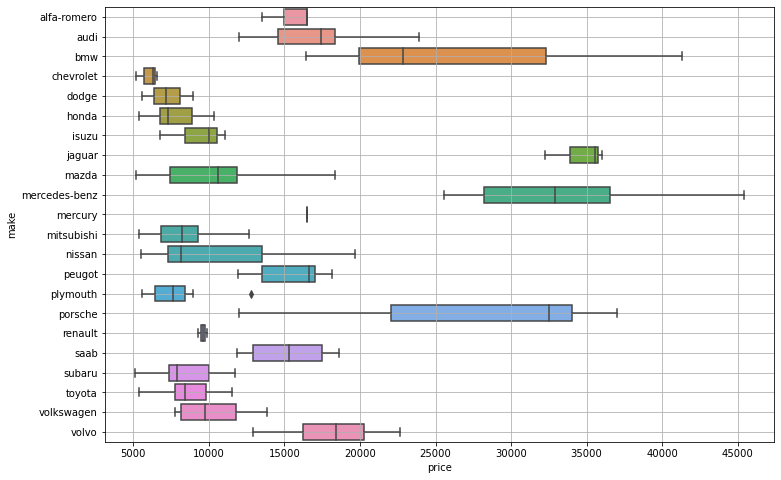

In [20]:
#visualizing any outliers remaining or not
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="price", y="make")
plt.grid(True)

# Encoding: converting catagorical data into numerical data

- OneHotEncoding: it is used when we have to convert only two type of catagorical data, i.e male or female; true or false into 0 and 1; i.e 0 as false or male and 1 as true or female, versa.

- LabelEncoding: it is use when there are more than 2 categorical data.

In [22]:
#checking any catgorical or object data left in model
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    object 
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   body-style         195 non-null    object 
 5   drive-wheels       195 non-null    object 
 6   engine-location    195 non-null    object 
 7   width              195 non-null    float64
 8   height             195 non-null    float64
 9   engine-type        195 non-null    object 
 10  engine-size        195 non-null    int64  
 11  horsepower         195 non-null    object 
 12  city-mpg           195 non-null    int64  
 13  highway-mpg        195 non-null    int64  
 14  price              195 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 28.4+ KB


In [23]:
#spliting data into object and numerical, as we have to provide only catagorical data to encode
df_cat = df.select_dtypes(object) 
df_num = df.select_dtypes(["int64", "float64"])

In [24]:
df_cat

,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
0,?,alfa-romero,gas,convertible,rwd,front,dohc,111
1,?,alfa-romero,gas,convertible,rwd,front,dohc,111
2,?,alfa-romero,gas,hatchback,rwd,front,ohcv,154
3,164,audi,gas,sedan,fwd,front,ohc,102
4,164,audi,gas,sedan,4wd,front,ohc,115
...,...,...,...,...,...,...,...,...
200,95,volvo,gas,sedan,rwd,front,ohc,114
201,95,volvo,gas,sedan,rwd,front,ohc,160
202,95,volvo,gas,sedan,rwd,front,ohcv,134
203,95,volvo,diesel,sedan,rwd,front,ohc,106


In [25]:
df_num

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
0,3,64.1,48.8,130,21,27,13495
1,3,64.1,48.8,130,21,27,16500
2,1,65.5,52.4,152,19,26,16500
3,2,66.2,54.3,109,24,30,13950
4,2,66.4,54.3,136,18,22,17450
...,...,...,...,...,...,...,...
200,-1,68.9,55.5,141,23,28,16845
201,-1,68.8,55.5,141,19,25,19045
202,-1,68.9,55.5,173,18,23,21485
203,-1,68.9,55.5,145,26,27,22470


In [26]:
#finding types of data 
df_cat["fuel-type"].value_counts()

gas       175
diesel     20
Name: fuel-type, dtype: int64

In [29]:
df_cat["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [30]:
#one hot encoding
pd.get_dummies(df_cat["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [31]:
df["make"].nunique()

22

In [32]:
#one hot encoding
pd.get_dummies(df_cat["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


# Label Encoding

In [34]:
#label encoding module
from sklearn.preprocessing import LabelEncoder

In [35]:
df_cat["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [36]:
#label encoding
le = LabelEncoder()
le.fit_transform(df_cat["fuel-type"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [37]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [38]:
le = LabelEncoder()

le.fit_transform(df_cat["fuel-type"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [39]:
#le = LabelEncoder()

#le.fit_transform(df_cat)

In [40]:
#label encoding all the rows in catagorical data
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [41]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


# Skewness: It checks the distribution symmetry w.r.t other columns and rows.
- it should be in bell shape.
- types: positively skewed and negatively skewed

In [42]:
from scipy.stats import skew

In [43]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


symboling
0.21386866184357742


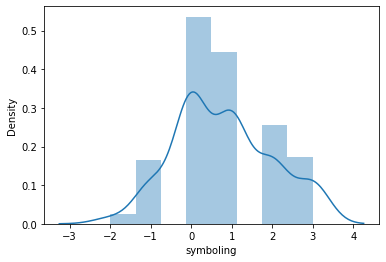

normalized-losses
0.848205953606264


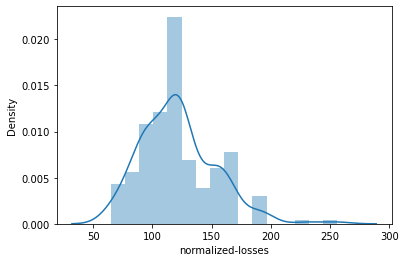

width
0.9140400320504322


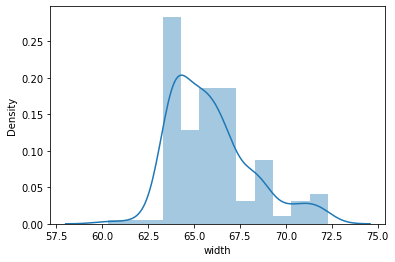

height
0.013839962443639326


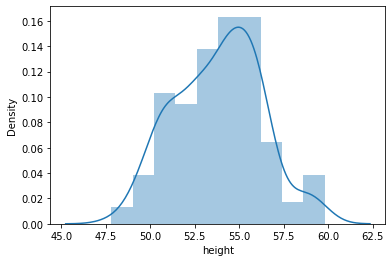

engine-size
2.0541257626466156


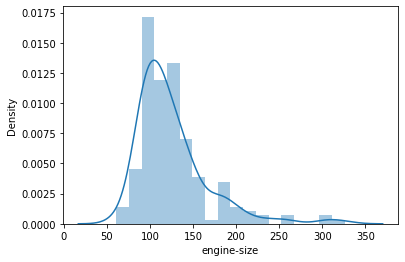

horsepower
1.5556576549504106


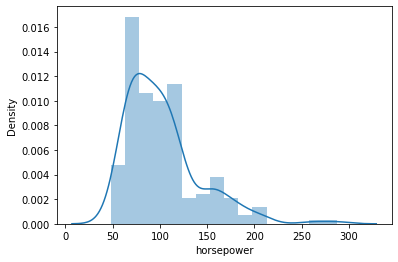

city-mpg
0.5999073033714895


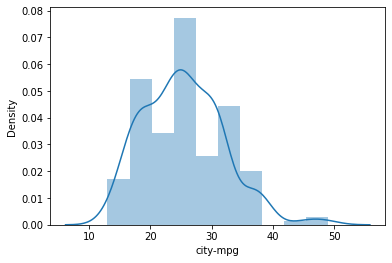

highway-mpg
0.4760310091695327


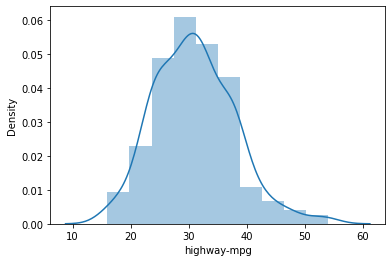

price
1.8166794702973463


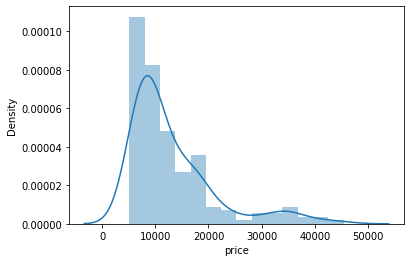

In [44]:
#checking skewness of all columns in dfnum
for col in df_num:
    print(col)
    print(skew( df_num[col] ))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [45]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


<AxesSubplot:>

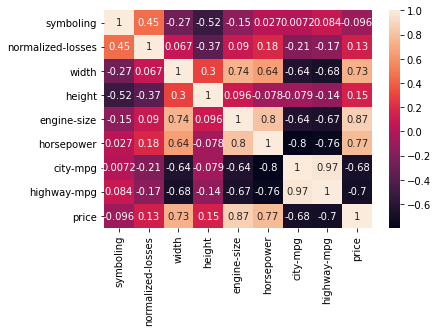

In [46]:
sns.heatmap(df.corr(), annot=True)

In [47]:
np.log(-3)

nan

In [48]:
np.sqrt(-3)

nan

In [49]:
df_num["normalized-losses"] =np.sqrt(df_num["normalized-losses"])

In [50]:
skew(df_num["normalized-losses"])

0.4136415061835428

# Scaling: used to convert whole data into one scale

In [51]:
n1 = 1000 #gram -> 1kg
n2 = 10   #kg

In [52]:
n2>n1

False

In [53]:
a = np.array([1,2,3,4,5])
b = np.array([10,20,30,40,50])
c = np.array([100,200,300,400,500])

- MinMaxScaler
- StandardScaler

In [54]:
def minmax(arr):
    res = (arr - arr.min())/(arr.max() - arr.min())
    return res
    

In [55]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [56]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [57]:
minmax(c)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,9.746794,68.9,55.5,141,114.0,23,28,16845
201,-1,9.746794,68.8,55.5,141,160.0,19,25,19045
202,-1,9.746794,68.9,55.5,173,134.0,18,23,21485
203,-1,9.746794,68.9,55.5,145,106.0,26,27,22470


In [60]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [61]:
df = pd.concat([df_cat, df_num], axis=1)

In [62]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,11.045361,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,12.806248,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,12.806248,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,9.746794,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,9.746794,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,9.746794,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,9.746794,68.9,55.5,145,106.0,26,27,22470


In [63]:
#for col in df:
#    sc = StandardScaler()
#    df[col] = sc.fit_transform(df[[col]])

In [64]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,11.045361,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,12.806248,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,12.806248,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,9.746794,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,9.746794,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,9.746794,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,9.746794,68.9,55.5,145,106.0,26,27,22470


In [65]:
from sklearn.preprocessing import MinMaxScaler
for col in df:
    mm = MinMaxScaler()
    df[col] = mm.fit_transform(df[[col]])

In [66]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.207959
1,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.282558
2,0.000000,1.0,0.50,1.0,0.0,0.833333,0.6,0.375813,0.433333,0.383333,0.343396,0.441667,0.166667,0.263158,0.282558
3,0.047619,1.0,0.75,0.5,0.0,0.500000,0.8,0.597650,0.491667,0.541667,0.181132,0.225000,0.305556,0.368421,0.219254
4,0.047619,1.0,0.75,0.0,0.0,0.500000,0.8,0.597650,0.508333,0.541667,0.283019,0.279167,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.000000,1.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.716667,0.641667,0.301887,0.275000,0.277778,0.315789,0.291123
201,1.000000,1.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.708333,0.641667,0.301887,0.466667,0.166667,0.236842,0.345738
202,1.000000,1.0,0.75,1.0,0.0,0.833333,0.2,0.212219,0.716667,0.641667,0.422642,0.358333,0.138889,0.184211,0.406311
203,1.000000,0.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.716667,0.641667,0.316981,0.241667,0.361111,0.289474,0.430763


# Feature Engineering

In [67]:
#Area = Width * Height

In [68]:
df["Area"] = df["width"] * df["height"]

In [69]:
df

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,Area
0,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.207959,0.026389
1,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.282558,0.026389
2,0.000000,1.0,0.50,1.0,0.0,0.833333,0.6,0.375813,0.433333,0.383333,0.343396,0.441667,0.166667,0.263158,0.282558,0.166111
3,0.047619,1.0,0.75,0.5,0.0,0.500000,0.8,0.597650,0.491667,0.541667,0.181132,0.225000,0.305556,0.368421,0.219254,0.266319
4,0.047619,1.0,0.75,0.0,0.0,0.500000,0.8,0.597650,0.508333,0.541667,0.283019,0.279167,0.138889,0.157895,0.306142,0.275347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.000000,1.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.716667,0.641667,0.301887,0.275000,0.277778,0.315789,0.291123,0.459861
201,1.000000,1.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.708333,0.641667,0.301887,0.466667,0.166667,0.236842,0.345738,0.454514
202,1.000000,1.0,0.75,1.0,0.0,0.833333,0.2,0.212219,0.716667,0.641667,0.422642,0.358333,0.138889,0.184211,0.406311,0.459861
203,1.000000,0.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.716667,0.641667,0.316981,0.241667,0.361111,0.289474,0.430763,0.459861
